In [29]:
!pip install beautifulsoup4

In [30]:
# for response

from bs4 import BeautifulSoup
import requests

url = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')
soup = requests.get(url)

print(soup)

C:\Users\Acer\AppData\Local\Temp\ipykernel_25836\1744062536.py:6: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



<Response [200]>


In [31]:
#to change the response into text
codes = soup.text

In [32]:
#to change the text into lxml i.e. same as source code.
codes = BeautifulSoup(codes, "lxml")
codes

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no, initial-scale = 1.0, minimum-scale=1.0, maximum-scale = 1.0" name="viewport"/>
<meta content=" sharesansar, sharesansar.com, share market, best site, nepali bazar, news, nepal, economics, politics, entertainment, business, politics, businessman, online news, real state, tax, banking, corporate, telecom,  nepse, ipo, agm, bond, Oil, Gold, profit, shareholder, NEPSE, pravhu, ILFC, Stock, exchange, citizen, nepal., loan, loss, provision,  arun, valley, kabeli,  Economy, Growth, Rate, Eid, Public, Holiday,  Mastercard, Standard, Chartered, Credit, Card, Visa, Warren, Buffett, Value, Investing,Nepal Stock Exchange (NEPSE) Live Trading Data, Floorsheet, Live Indices, Top Gainers, Top Losers, nepse, shareapp, limted, iporesult, bank , share, bank, company, promoter, bittya santha" name="keywords"/>
<title>Live Trading - || ShareSansar ||</title>
<!--[if IE]><script src="http://

In [33]:
# to get codes only for table
table_code = codes.table
table_code

<table class="table table-bordered table-striped table-hover dataTable compact" id="headFixed">
<thead>
<tr>
<th width="10px">S.No</th>
<th>Symbol</th>
<th class="text-center">LTP</th>
<th class="text-center">Point Change</th>
<th class="text-center">% Change</th>
<th class="text-center">Open</th>
<th class="text-center">High</th>
<th class="text-center">Low</th>
<th class="text-center">Volume</th>
<th class="text-center">Prev. Close</th>
</tr>
</thead>
<tbody>
<tr>
<td class="success-index">
                                        1</td>
<td class="success-index">
<a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
</td>
<td class="text-center success-index">
                                        1,207.80</td>
<td class="text-center success-index">
                                        62.91</td>
<td class="text-center success-index">
                                        5.49</td>
<td class="text-center success-index">
                                

In [34]:
# to get only the tr tags code

tags = table_code.find_all('tr')
tags

[<tr>
 <th width="10px">S.No</th>
 <th>Symbol</th>
 <th class="text-center">LTP</th>
 <th class="text-center">Point Change</th>
 <th class="text-center">% Change</th>
 <th class="text-center">Open</th>
 <th class="text-center">High</th>
 <th class="text-center">Low</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Prev. Close</th>
 </tr>,
 <tr>
 <td class="success-index">
                                         1</td>
 <td class="success-index">
 <a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
 </td>
 <td class="text-center success-index">
                                         1,207.80</td>
 <td class="text-center success-index">
                                         62.91</td>
 <td class="text-center success-index">
                                         5.49</td>
 <td class="text-center success-index">
                                         1,150.00</td>
 <td class="text-center success-index">
                                

In [35]:
# to get only text/data withing tr tag and append it to list

data = []
for i in tags:
    x = i.text
    data.append(x)

data

['\nS.No\nSymbol\nLTP\nPoint Change\n% Change\nOpen\nHigh\nLow\nVolume\nPrev. Close\n',
 '\n\n                                        1\n\nACLBSL\n\n\n                                        1,207.80\n\n                                        62.91\n\n                                        5.49\n\n                                        1,150.00\n\n                                        1,218.90\n\n                                        1,150.00\n\n                                        18,153.00\n\n                                        1,144.89\n',
 '\n\n                                        2\n\nADBL\n\n\n                                        336.59\n\n                                        -3.01\n\n                                        -0.89\n\n                                        338.00\n\n                                        341.00\n\n                                        335.10\n\n                                        72,244.00\n\n                          

In [36]:
#to spereate table header and store it in col

col = data[0].split("\n")[2:-1]
col

['Symbol',
 'LTP',
 'Point Change',
 '% Change',
 'Open',
 'High',
 'Low',
 'Volume',
 'Prev. Close']

In [37]:
# to isloate table datas from table header and remove \n\n and extra space

rows_data = []
rows = data[1:]
for i in rows:
    y = (i.replace("\n\n","").split("                                        "))
    y[1] = y[1].replace("\n", "")
    y[-1] = y[-1].replace("\n", "")
    print(y[1:])
    rows_data.append(y[1:])

['1ACLBSL', '1,207.80', '62.91', '5.49', '1,150.00', '1,218.90', '1,150.00', '18,153.00', '1,144.89']
['2ADBL', '336.59', '-3.01', '-0.89', '338.00', '341.00', '335.10', '72,244.00', '339.60']
['3ADBLD83', '1,090.00', '-20.00', '-1.80', '1,100.00', '1,100.00', '1,090.00', '696.00', '1,110.00']
['4AHL', '685.61', '24.15', '3.65', '667.00', '700.00', '651.00', '18,161.00', '661.46']
['5AHPC', '323.50', '9.68', '3.08', '315.00', '324.00', '315.00', '869,068.00', '313.82']
['6AKJCL', '228.59', '4.26', '1.90', '219.90', '233.50', '219.90', '487,211.00', '224.33']
['7AKPL', '289.39', '6.29', '2.22', '285.00', '293.00', '285.00', '887,555.00', '283.10']
['8ALBSL', '930.05', '-1.46', '-0.16', '920.00', '950.00', '920.00', '13,099.00', '931.51']
['9ALICL', '538.53', '0.27', '0.05', '548.00', '548.00', '533.10', '104,627.00', '538.26']
['10ANLB', '5,785.00', '151.16', '2.68', '5,611.10', '5,929.00', '5,532.00', '1,978.00', '5,633.84']
['11API', '326.63', '6.11', '1.91', '326.00', '327.00', '319.

In [38]:
#convert the above list inside list data into tabular form/csv

import pandas as pd
df = pd.DataFrame(rows_data, columns = col)
df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
0,1ACLBSL,"1,207.80",62.91,5.49,"1,150.00","1,218.90","1,150.00","18,153.00","1,144.89"
1,2ADBL,336.59,-3.01,-0.89,338.00,341.00,335.10,"72,244.00",339.60
2,3ADBLD83,"1,090.00",-20.00,-1.80,"1,100.00","1,100.00","1,090.00",696.00,"1,110.00"
3,4AHL,685.61,24.15,3.65,667.00,700.00,651.00,"18,161.00",661.46
4,5AHPC,323.50,9.68,3.08,315.00,324.00,315.00,"869,068.00",313.82
...,...,...,...,...,...,...,...,...,...
323,324USHL,721.31,-11.87,-1.62,720.00,763.00,702.10,"6,606.00",733.18
324,325USLB,"2,517.82",-93.53,-3.58,"2,559.20","2,641.00","2,350.30","58,242.00","2,611.35"
325,326VLBS,925.97,-8.59,-0.92,925.00,940.00,920.00,"6,514.00",934.56
326,327VLUCL,655.43,8.92,1.38,636.50,659.00,636.50,"22,227.00",646.51


In [39]:
try:
    df['LTP'] = [float(i.replace(",","")) for i in df['LTP']]
    df['Open'] = [float(i.replace(",","")) for i in df['Open']]
    df['High'] = [float(i.replace(",","")) for i in df['High']]
    df['Low'] = [float(i.replace(",","")) for i in df['Low']]
    df['Volume'] = [float(i.replace(",","")) for i in df['Volume']]
    df['Prev. Close'] = [float(i.replace(",","")) for i in df['Prev. Close']]

except:
    pass

In [40]:
df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
0,1ACLBSL,1207.80,62.91,5.49,1150.0,1218.9,1150.0,18153.0,1144.89
1,2ADBL,336.59,-3.01,-0.89,338.0,341.0,335.1,72244.0,339.60
2,3ADBLD83,1090.00,-20.00,-1.80,1100.0,1100.0,1090.0,696.0,1110.00
3,4AHL,685.61,24.15,3.65,667.0,700.0,651.0,18161.0,661.46
4,5AHPC,323.50,9.68,3.08,315.0,324.0,315.0,869068.0,313.82
...,...,...,...,...,...,...,...,...,...
323,324USHL,721.31,-11.87,-1.62,720.0,763.0,702.1,6606.0,733.18
324,325USLB,2517.82,-93.53,-3.58,2559.2,2641.0,2350.3,58242.0,2611.35
325,326VLBS,925.97,-8.59,-0.92,925.0,940.0,920.0,6514.0,934.56
326,327VLUCL,655.43,8.92,1.38,636.5,659.0,636.5,22227.0,646.51


In [41]:
!pip install plotly

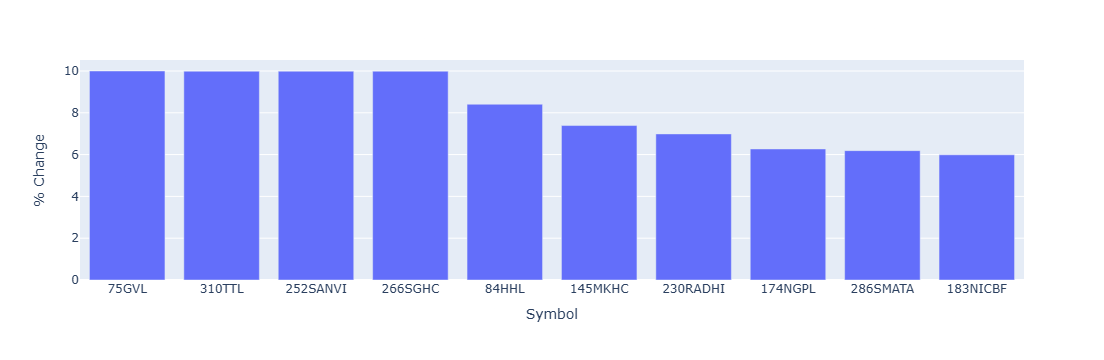

In [44]:
import plotly.express as px
try:
    df['% Change'] = [float(i.replace(",","")) for i in df['% Change']]
except:
    pass
plot_df = df.sort_values(by = '% Change', ascending = False).head(10)
fig = px.bar(plot_df, x='Symbol', y='% Change')
fig.show()

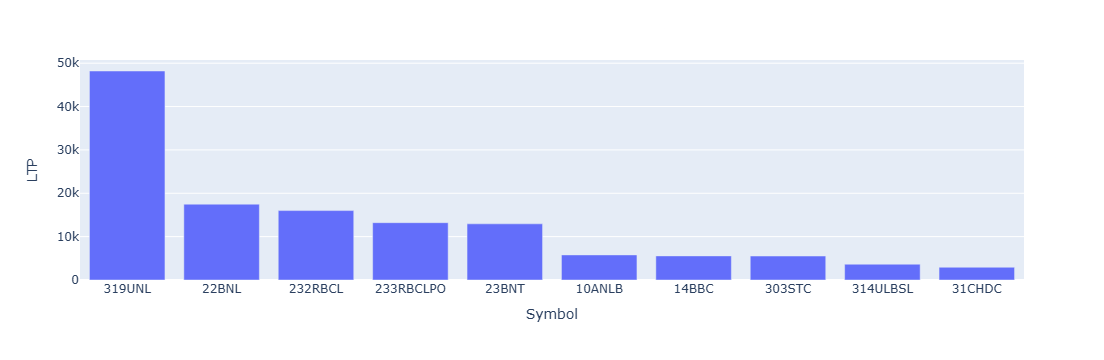

In [43]:
import plotly.express as px
plot_df = df.sort_values(by = 'LTP', ascending = False).head(10)
fig = px.bar(plot_df, x='Symbol', y='LTP')
fig.show()

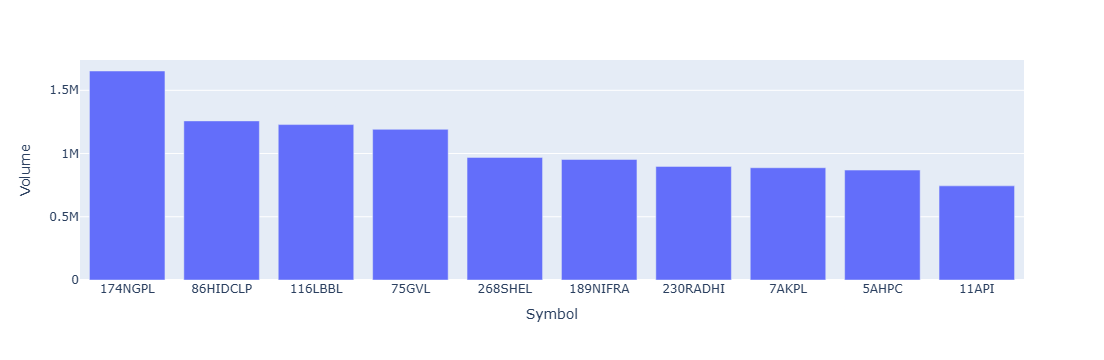

In [45]:
import plotly.express as px
plot_df = df.sort_values(by = 'Volume', ascending = False).head(10)
fig = px.bar(plot_df, x='Symbol', y='Volume')
fig.show()